In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

664922    127500.000000
663179    108360.000000
151330     67194.398438
601716    102000.000000
84511      52000.000000
762099     44720.000000
364909    100400.000000
541609    245000.000000
644771     50325.035156
446619    156500.000000
Name: salary_year_avg, dtype: float64

<Axes: >

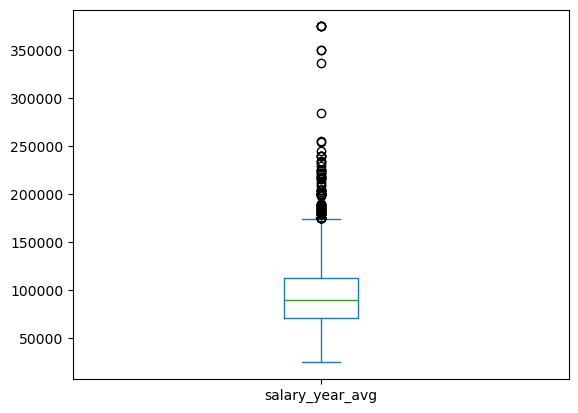

In [7]:
df_DA_US['salary_year_avg'].plot(kind='box')

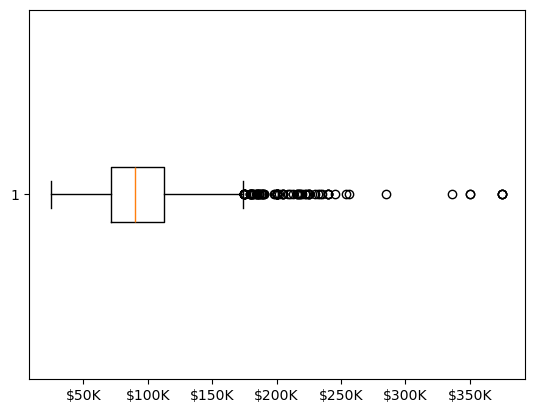

In [10]:
plt.boxplot(df_DA_US['salary_year_avg'], vert=False)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

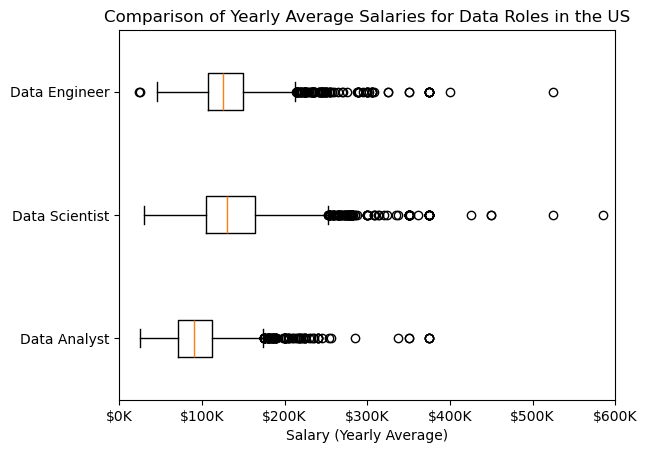

In [35]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Filter data untuk job_titles dan negara 'United States'
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

# Hapus baris yang memiliki nilai NaN pada kolom 'salary_year_avg'
df_US = df_US.dropna(subset=['salary_year_avg'])

# Membuat daftar gaji berdasarkan job_titles
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

# Membuat boxplot
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.xlabel('Salary (Yearly Average)')
plt.title('Comparison of Yearly Average Salaries for Data Roles in the US')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()


In [15]:
job_list[0]

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64